In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
store = pd.read_csv('store.csv')

print(train.head())


/tmp/ipython-input-1108076675.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [ ]:
import pandas as pd

# Load data
train = pd.read_csv('train.csv')
store = pd.read_csv('store.csv')

# Convert Date to datetime
train['Date'] = pd.to_datetime(train['Date'])

# Create new features
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week

# Merge store info
df = train.merge(store, on='Store', how='left')

# Fill missing values
df.fillna(0, inplace=True)

df.head()



/tmp/ipython-input-2404961663.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Week,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [2]:
import os
os.listdir()


['.config', 'sample_data']

In [6]:
import pandas as pd

# if your file is already uploaded
df = pd.read_csv('monthly_sales.csv')
df.head()


,Year,Month,Sales,Date
0,2013,1,180132207,2013-01-01
1,2013,2,171534275,2013-02-01
2,2013,3,201180369,2013-03-01
3,2013,4,183431432,2013-04-01
4,2013,5,185411063,2013-05-01


In [7]:
import pandas as pd

# if your file is already uploaded
df = pd.read_csv('monthly_sales.csv')
df.head()


,Year,Month,Sales,Date
0,2013,1,180132207,2013-01-01
1,2013,2,171534275,2013-02-01
2,2013,3,201180369,2013-03-01
3,2013,4,183431432,2013-04-01
4,2013,5,185411063,2013-05-01


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Year,Month,Sales,Date
0,2013,1,180132207,2013-01-01
1,2013,2,171534275,2013-02-01
2,2013,3,201180369,2013-03-01
3,2013,4,183431432,2013-04-01
4,2013,5,185411063,2013-05-01


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Year,Month,Sales,Date
0,2013,1,180132207,2013-01-01
1,2013,2,171534275,2013-02-01
2,2013,3,201180369,2013-03-01
3,2013,4,183431432,2013-04-01
4,2013,5,185411063,2013-05-01


In [10]:
df_prophet = df[['Date', 'Sales']].copy()
df_prophet.columns = ['ds', 'y']
df_prophet.head()


,ds,y
0,2013-01-01,180132207
1,2013-02-01,171534275
2,2013-03-01,201180369
3,2013-04-01,183431432
4,2013-05-01,185411063


In [11]:
!pip install prophet


In [12]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [13]:
future = model.make_future_dataframe(periods=6, freq='M')
future.tail()


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
32,2015-08-31
33,2015-09-30
34,2015-10-31
35,2015-11-30
36,2015-12-31


In [14]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
32,2015-08-31,2.450955e+08,2.353636e+08,2.559413e+08
33,2015-09-30,2.081789e+08,1.980020e+08,2.189506e+08
34,2015-10-31,1.961560e+08,1.847372e+08,2.064617e+08
35,2015-11-30,1.444411e+08,1.339137e+08,1.551681e+08
36,2015-12-31,2.680248e+08,2.569235e+08,2.783628e+08


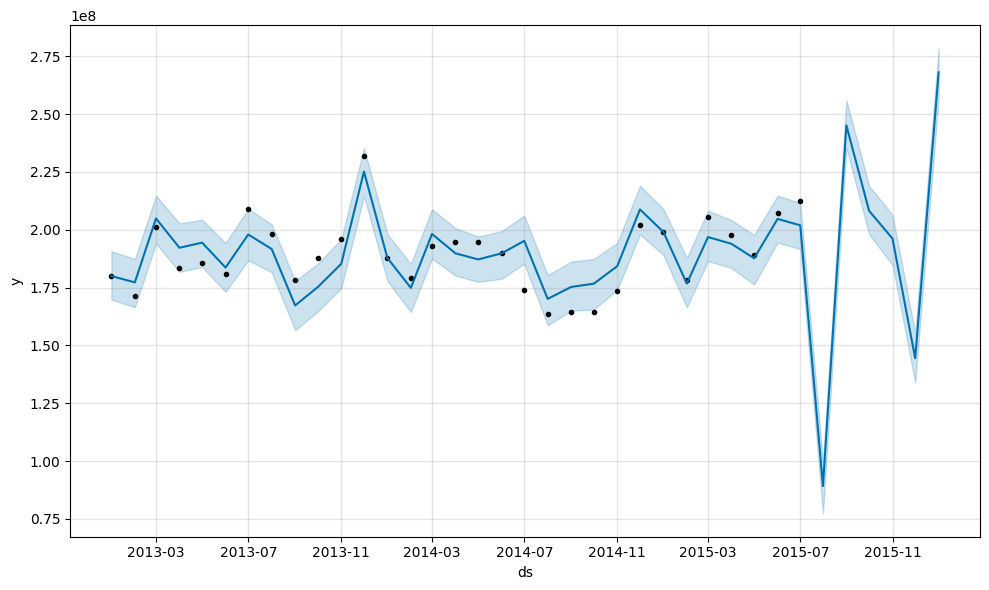

In [15]:
fig = model.plot(forecast)


In [16]:
forecast_out = forecast[['ds', 'yhat']]
forecast_out.to_csv('forecast_sales.csv', index=False)
forecast_out.head()


,ds,yhat
0,2013-01-01,1.799684e+08
1,2013-02-01,1.772301e+08
2,2013-03-01,2.048456e+08
3,2013-04-01,1.921982e+08
4,2013-05-01,1.944014e+08


In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

monthly_sales.head()


,Year,Month,Sales,Date
0,2013,1,180132207,2013-01-01
1,2013,2,171534275,2013-02-01
2,2013,3,201180369,2013-03-01
3,2013,4,183431432,2013-04-01
4,2013,5,185411063,2013-05-01


In [ ]:
monthly_sales.to_csv('monthly_sales.csv', index=False)
print("File saved successfully!")


File saved successfully!


In [ ]:
store = pd.read_csv('/content/store.csv')

data = train.merge(store, on='Store', how='left')
data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store = pd.read_csv('/content/store.csv')

data = train.merge(store, on='Store', how='left')
data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df = data[['Date', 'Sales']]
df = df.groupby('Date').sum().reset_index()

df.columns = ['ds', 'y']
df.head()


,ds,y
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593


In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=90)  # 90 days forecast
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1027,2015-10-25,3.123249e+05,-1.939438e+06,2.466563e+06
1028,2015-10-26,8.549976e+06,6.292029e+06,1.107569e+07
1029,2015-10-27,7.700570e+06,5.388967e+06,9.863732e+06
1030,2015-10-28,7.234714e+06,4.835424e+06,9.540140e+06
1031,2015-10-29,6.926119e+06,4.592913e+06,9.436453e+06


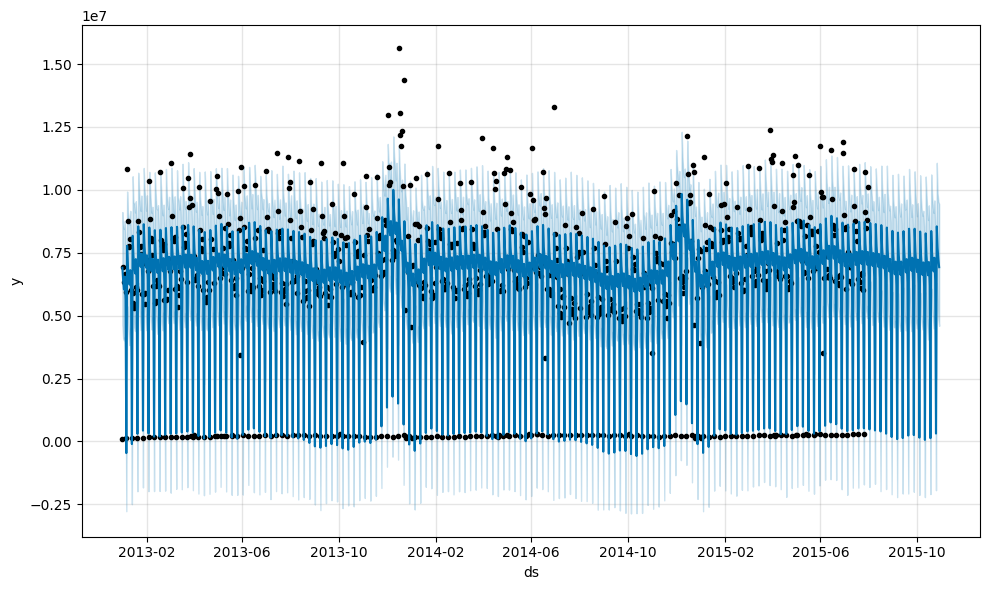

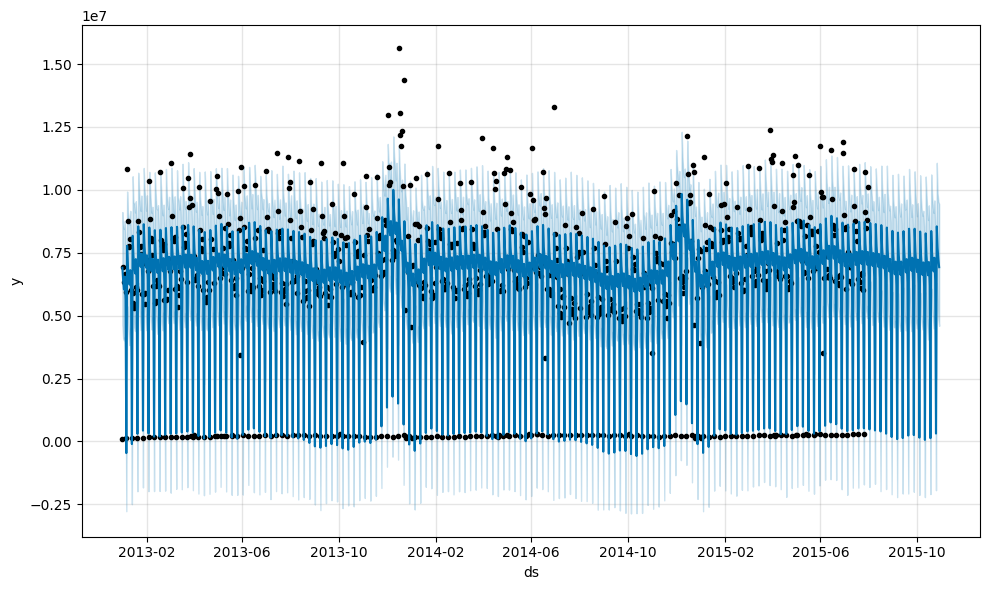

In [ ]:
model.plot(forecast)
